In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
from sklearn import feature_selection

In [2]:
np.random.seed(7)

In [3]:
data = pd.read_csv('OnlineNewsPopularity.csv')

In [4]:
sns.set_theme(context='notebook', style='whitegrid', palette='Set2')

In [5]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [6]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [8]:
#sve kolone počinju sa praznim poljem, zbog dalje analize potrebno je izbrisati ovo prazno polje
data.columns = data.columns.str.lstrip()

In [9]:
#kolone url i timedelta nemaju značaj za analizu
data = data.drop(labels=['url', 'timedelta'], axis=1)

In [10]:
data.shape

(39644, 59)

In [11]:
numeric_attributes = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
                      'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
                      'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
                      'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
                      'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
                      'LDA_01', 'LDA_02','LDA_03','LDA_04','global_subjectivity','global_sentiment_polarity',
                      'global_rate_positive_words', 'global_rate_negative_words','rate_positive_words',
                      'rate_negative_words','avg_positive_polarity','min_positive_polarity','max_positive_polarity',
                      'avg_negative_polarity','min_negative_polarity','max_negative_polarity','title_subjectivity',
                      'title_sentiment_polarity','abs_title_subjectivity', 'abs_title_sentiment_polarity', 'shares']

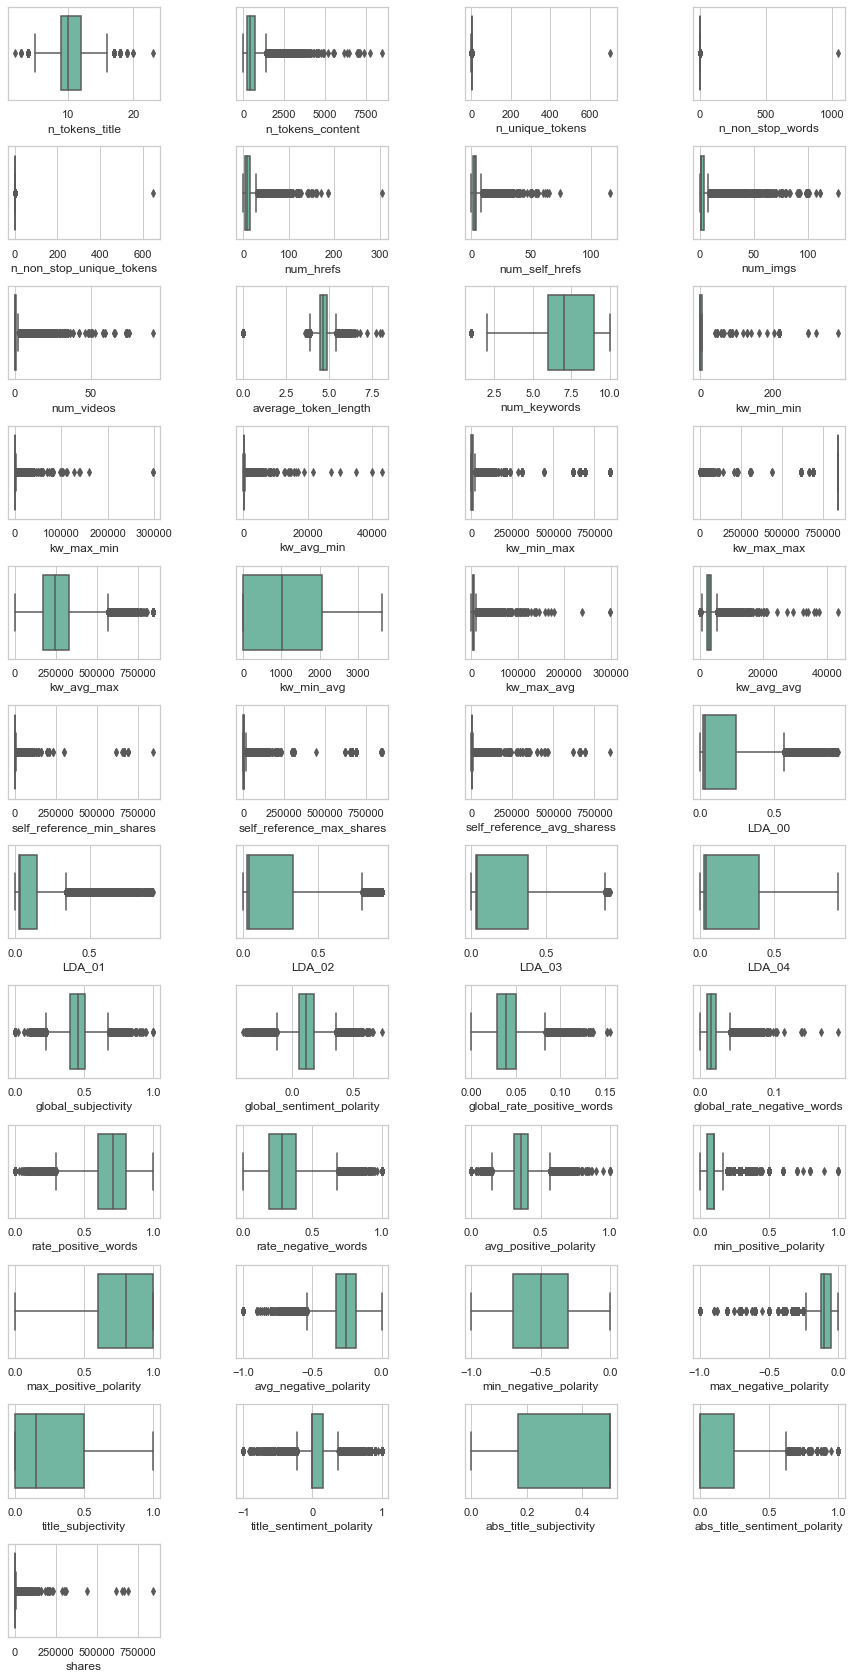

In [12]:
fig=plt.figure(figsize=(15,30))
plt_ind=1

for i in range(0, len(numeric_attributes)):
    fig.add_subplot(12,4,plt_ind)
    column = numeric_attributes[i]
    sns.boxplot(x=data[column])
   # plt.title(f"Boxplot za: {column}")   
        
    plt_ind+=1

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [13]:
for attribute in numeric_attributes:
    # Izračunavanje granica za definisanje outliera
    Q1 = data[attribute].quantile(0.25)
    Q3 = data[attribute].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtriranje podataka bez outliera
    data = data[(data[attribute] >= lower_bound) & (data[attribute] <= upper_bound)]


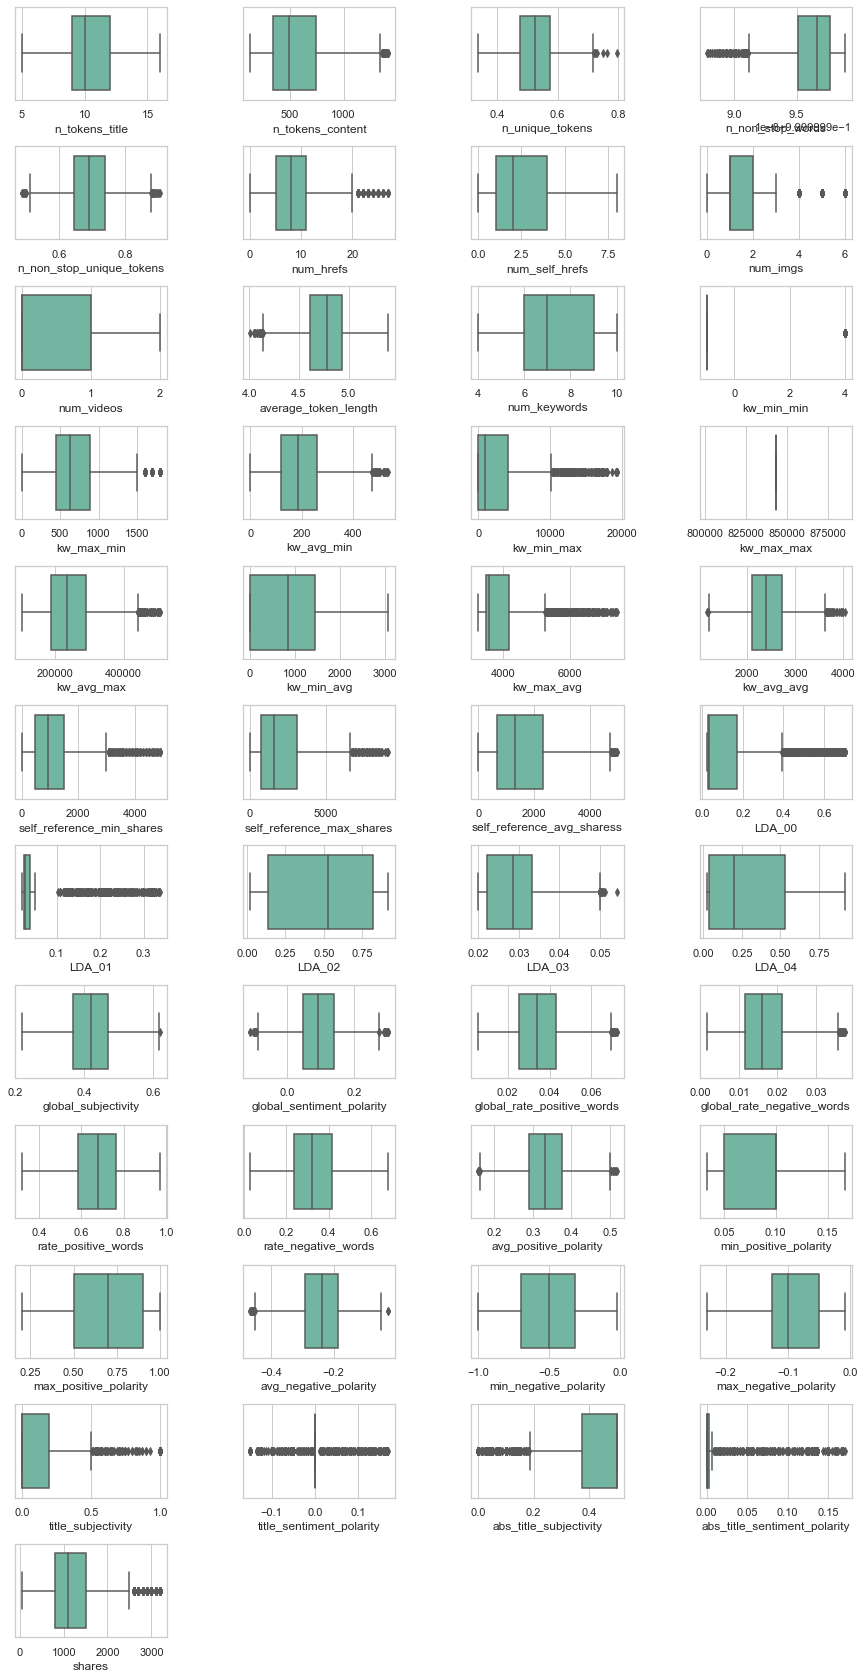

In [14]:
fig=plt.figure(figsize=(15,30))
plt_ind=1

for i in range(0, len(numeric_attributes)):
    fig.add_subplot(12,4,plt_ind)
    column = numeric_attributes[i]
    sns.boxplot(x=data[column])

        
    plt_ind+=1

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [15]:
data.shares.median()

1100.0

In [16]:
data.shares.mean()

1227.359790095113

In [17]:
data.shape

(3049, 59)

In [18]:
data.is_weekend.value_counts()

0.0    2725
1.0     324
Name: is_weekend, dtype: int64

In [19]:
drop_days = ['weekday_is_monday', 'weekday_is_tuesday',
           'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
           'weekday_is_saturday', 'weekday_is_sunday']

In [20]:
drop_channel = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 
                'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
               'data_channel_is_world']

In [21]:
data_no_days = data.drop(labels=drop_days, axis=1)

In [22]:
data_no_days.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'is_weekend', 'LDA_00', 'LDA_01',
       'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity

In [23]:
data_no_channel = data_no_days.drop(labels=drop_channel, axis=1)

In [24]:
data_no_channel.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'is_weekend', 'LDA_00', 'LDA_01',
       'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity',

In [25]:
correlation_matrix = data_no_channel.corr().abs()

In [26]:
correlation_matrix_shares = data_no_channel.corr()['shares'].abs()

In [27]:
sorted_correlation = correlation_matrix_shares.sort_values(ascending=False)

In [28]:
sorted_correlation

shares                          1.000000
kw_avg_avg                      0.224707
LDA_02                          0.203070
self_reference_min_shares       0.181181
LDA_04                          0.178433
self_reference_avg_sharess      0.174746
is_weekend                      0.149827
self_reference_max_shares       0.131053
rate_positive_words             0.111573
rate_negative_words             0.111573
global_rate_positive_words      0.099118
kw_max_avg                      0.099073
global_sentiment_polarity       0.095506
average_token_length            0.092604
kw_min_avg                      0.089445
num_self_hrefs                  0.080857
kw_avg_max                      0.076872
kw_max_min                      0.073273
num_imgs                        0.072424
LDA_00                          0.071939
kw_avg_min                      0.071905
global_subjectivity             0.071643
kw_min_max                      0.069434
global_rate_negative_words      0.061536
n_non_stop_words

In [29]:
to_drop = correlation_matrix_shares[correlation_matrix_shares < 0.1].index.tolist()

In [30]:
data_final = data_no_channel.drop(data[to_drop], axis=1)

In [31]:
data_final = data_no_channel.drop(labels='kw_max_max', axis=1)

In [32]:
data_final.shape

(3049, 45)

In [33]:
data_final.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'is_weekend', 'LDA_00', 'LDA_01',
       'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares'],
  

In [34]:
len(to_drop)

35

### Linearna regresija

In [35]:
def rezultat(y_true, y_pred, model):

    MAE=metrics.mean_absolute_error(y_true, y_pred) 
    MSE=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)
    
    print('Rezultati za model: ', model)
    print('MAE: ', round(MAE,4))
    print('MSE: ', round(MSE,4))   
    print('r2: ', round(r2,4))

In [36]:
y = data_final.shares
x = data_final.drop(labels=['shares'], axis =1)

In [37]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.3)

In [38]:
scaler = preprocessing.StandardScaler()

In [39]:
scaler.fit(x_train)

StandardScaler()

In [40]:
x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)

In [41]:
model = linear_model.LinearRegression()

In [42]:
model.fit(x_train_scale, y_train)

LinearRegression()

In [43]:
for feature, coef in zip(x.columns, model.coef_.ravel()):
    print(feature, coef)

n_tokens_title -7.679845571640829
n_tokens_content 11.479060001702058
n_unique_tokens -57.98599065798089
n_non_stop_words -31.24796052339779
n_non_stop_unique_tokens 59.116574869006776
num_hrefs 31.75611866604391
num_self_hrefs -10.90083924760219
num_imgs 39.23714911399219
num_videos 6.194808788492003
average_token_length -6.699795839731614
num_keywords 38.33262054842114
kw_min_min -22.70170964450277
kw_max_min 9.606837485021211
kw_avg_min 29.7082949598593
kw_min_max 12.77974961094397
kw_avg_max 13.164865764272582
kw_min_avg -30.551915077158725
kw_max_avg -51.04744566978527
kw_avg_avg 124.63027717116043
self_reference_min_shares 85.98608945424995
self_reference_max_shares 22.979089216548118
self_reference_avg_sharess -8.342808691156312
is_weekend 113.98125511871446
LDA_00 8380433586990.664
LDA_01 3092370238515.7095
LDA_02 14840848187267.139
LDA_03 336395787742.2832
LDA_04 13374316672078.008
global_subjectivity 4.21029438703119
global_sentiment_polarity -50.85374232225493
global_rate_po

In [44]:
y_train_predicted = model.predict(x_train_scale)
y_test_predicted = model.predict(x_test_scale)

In [45]:
rezultat(y_train, y_train_predicted, model)

Rezultati za model:  LinearRegression()
MAE:  423.0154
MSE:  315290.525
r2:  0.1398


In [46]:
rezultat(y_test, y_test_predicted, model)

Rezultati za model:  LinearRegression()
MAE:  424.5251
MSE:  323923.9221
r2:  0.1175


### Linearna regresija sa lasso regularziacijom

In [47]:
model2 = linear_model.Lasso()

In [48]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 10, 20, 100]}
grid = model_selection.GridSearchCV(estimator=model2, param_grid=params, cv=10)

In [49]:
grid.fit(x_train_scale, y_train)

c:\users\nevena\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.222e+06, tolerance: 6.941e+04
  model = cd_fast.enet_coordinate_descent(
c:\users\nevena\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.593e+07, tolerance: 7.020e+04
  model = cd_fast.enet_coordinate_descent(
c:\users\nevena\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

c:\users\nevena\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.964e+06, tolerance: 6.856e+04
  model = cd_fast.enet_coordinate_descent(
c:\users\nevena\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.120e+06, tolerance: 7.050e+04
  model = cd_fast.enet_coordinate_descent(
c:\users\nevena\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9,
                                   1, 10, 20, 100]})

In [50]:
grid.best_params_

{'alpha': 10}

In [51]:
y_train_predicted2 = grid.predict(x_train_scale)
y_test_predicted2 = grid.predict(x_test_scale)

In [52]:
rezultat(y_train, y_train_predicted2, model2)

Rezultati za model:  Lasso()
MAE:  426.5098
MSE:  319325.5614
r2:  0.1288


In [53]:
rezultat(y_test, y_test_predicted2, model2)

Rezultati za model:  Lasso()
MAE:  426.5665
MSE:  325522.8186
r2:  0.1131


### Linearna regresija sa rekurzivnom eliminacijom atributa

In [54]:
#ovde pocinjemo sa data setom kojem su uklonjeni outlier, days i channel

In [55]:
x_new = data_no_channel.drop(labels='shares', axis = 1)
y_new = data_no_channel.shares

In [56]:
x_train_new, x_test_new, y_train_new, y_test_new = model_selection.train_test_split(x_new, y_new, test_size=0.3)

In [57]:
scaler1 = preprocessing.StandardScaler()

In [58]:
scaler1.fit(x_train_new)

StandardScaler()

In [59]:
x_train_new_sc = scaler1.transform(x_train_new)
x_test_new_sc = scaler1.transform(x_test_new)

In [60]:
model3 = feature_selection.RFE(estimator=linear_model.LinearRegression(), n_features_to_select=10)

In [61]:
model3.fit(x_train_new_sc, y_train_new)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [62]:
#zadržani atributi
x_new.columns[model3.support_]

Index(['kw_avg_avg', 'self_reference_min_shares', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'rate_positive_words',
       'rate_negative_words'],
      dtype='object')

In [63]:
izbaceni = model3.ranking_ > 1 
x_new.columns[izbaceni]

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [64]:
df = pd.DataFrame()
df['rank'] = model3.ranking_
df['kolone'] = x_new.columns

In [65]:
df.sort_values(by = 'rank', ascending=False, inplace=True)
df.loc[df['rank']>1]

,rank,kolone
21,36,self_reference_max_shares
36,35,min_positive_polarity
41,34,title_subjectivity
16,33,kw_avg_max
22,32,self_reference_avg_sharess
12,31,kw_max_min
10,30,num_keywords
11,29,kw_min_min
42,28,title_sentiment_polarity
9,27,average_token_length


In [66]:
x_selected_train = model3.transform(x_train_new_sc)
x_selected_test = model3.transform(x_test_new_sc)

In [67]:
model4 = linear_model.LinearRegression()

In [68]:
model4.fit(x_selected_train, y_train_new)

LinearRegression()

In [69]:
for feature, coef in zip(x_new.columns[model3.support_], model4.coef_):
    print(feature, coef)

kw_avg_avg 92.69103014569352
self_reference_min_shares 81.12852114365234
is_weekend 98.15655459476949
LDA_00 7925576397061.388
LDA_01 2847454601166.598
LDA_02 13988157323338.6
LDA_03 322045770494.5277
LDA_04 12627143386656.396
rate_positive_words -40772133064541.95
rate_negative_words -40772133064554.51


In [71]:
y_train_new_predict = model4.predict(x_selected_train)
y_test_new_predict = model4.predict(x_selected_test)

In [72]:
rezultat(y_train_new, y_train_new_predict, model)

Rezultati za model:  LinearRegression()
MAE:  434.9248
MSE:  335992.1855
r2:  0.1126


In [73]:
rezultat(y_test_new, y_test_new_predict, model)

Rezultati za model:  LinearRegression()
MAE:  411.0897
MSE:  297960.1455
r2:  0.1194


In [74]:
x = ['Linearna regresija', 
     'Linearna regresija sa lasso regularizacijom', 
     'Linearna regresija sa rekurzivnom eliminacijom atributa']


y = [metrics.r2_score(y_test, y_test_predicted), 
    metrics.r2_score(y_test, y_test_predicted2),
     metrics.r2_score(y_test_new, y_test_new_predict)]

y1 = [metrics.mean_absolute_error(y_test, y_test_predicted), 
    metrics.mean_absolute_error(y_test, y_test_predicted2),
     metrics.mean_absolute_error(y_test_new, y_test_new_predict)]

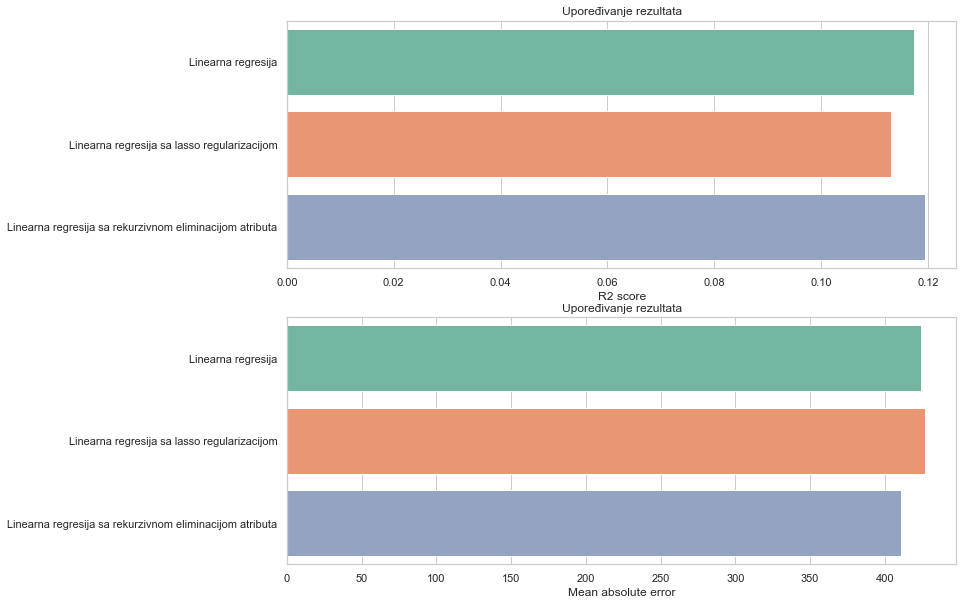

In [75]:
fig = plt.figure(figsize=(12,10))

fig.add_subplot(2, 1, 1)
sns.barplot(x=y,y=x);
plt.xlabel('R2 score')
plt.title('Upoređivanje rezultata')

fig.add_subplot(2, 1, 2)
sns.barplot(x=y1,y=x);
plt.xlabel('Mean absolute error')
plt.title('Upoređivanje rezultata')

plt.show()